In [47]:
import pandas as pd
#
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
#pd.set_option("display.width", None)
#pd.set_option("display.max_colwidth", None)

DEMO_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DEMO_L.xpt", format="xport")
DIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DIQ_L.xpt", format="xport")
GHB_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GHB_L.xpt", format="xport")
GLU_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GLU_L.xpt", format="xport")
HIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HIQ_L.xpt", format="xport")
HUQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HUQ_L.xpt", format="xport")
INQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/INQ_L.xpt", format="xport")
UCPREG_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/UCPREG_L.xpt", format="xport")




In [48]:
df = DEMO_21_23
df = df.merge(DIQ_21_23, on="SEQN", how="left")
df = df.merge(GHB_21_23, on="SEQN", how="left")
df = df.merge(GLU_21_23, on="SEQN", how="left")
df = df.merge(HIQ_21_23, on="SEQN", how="left")
df = df.merge(HUQ_21_23, on="SEQN", how="left")
df = df.merge(INQ_21_23, on="SEQN", how="left")
df = df.merge(UCPREG_21_23, on="SEQN", how="left")

df.shape

(11933, 60)

In [49]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG']

In [50]:
#df["bio_diabetes"] = df["LBXGH"].notna() & df["LBXGH"].ge(6.5)
#df["bio_diabetes"].value_counts()

#LBXGH = HbA1c level 

In [51]:
#df["LBXGH"].value_counts(dropna=False).sort_index(ascending=True)
#df = df[df["RIDAGEYR"] >= 20]

#df["bio_diabetes"].value_counts()
#(df["bio_diabetes"] == True).sum()

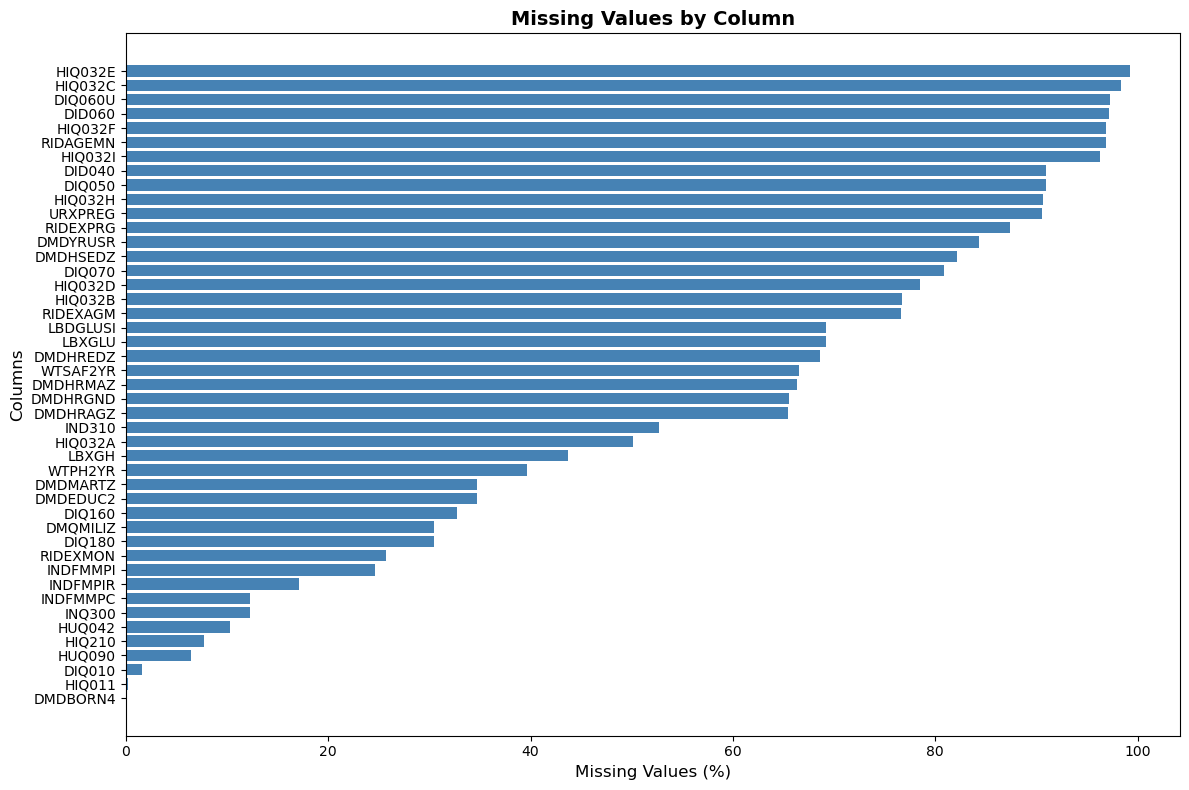

Total columns: 60
Columns with missing values: 45

Top 10 columns with most missing values:
  Column  Missing Count  Missing Percent
 HIQ032E          11839        99.212268
 HIQ032C          11732        98.315595
 DIQ060U          11601        97.217799
  DID060          11590        97.125618
 HIQ032F          11563        96.899355
RIDAGEMN          11556        96.840694
 HIQ032I          11482        96.220565
  DID040          10852        90.941088
  DIQ050          10852        90.941088
 HIQ032H          10813        90.614263
 URXPREG          10803        90.530462
RIDEXPRG          10430        87.404676
DMDYRUSR          10058        84.287271
DMDHSEDZ           9806        82.175480
  DIQ070           9652        80.884941
 HIQ032D           9368        78.504986
 HIQ032B           9157        76.736780
RIDEXAGM           9146        76.644599
LBDGLUSI           8261        69.228191
  LBXGLU           8261        69.228191
DMDHREDZ           8187        68.608062
WTSAF2

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a dataframe for visualization
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percent': missing_percent.values
})

# Filter to only show columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

# Create the visualization
plt.figure(figsize=(12, 8))
plt.barh(range(len(missing_df)), missing_df['Missing Percent'], color='steelblue')
plt.yticks(range(len(missing_df)), missing_df['Column'])
plt.xlabel('Missing Values (%)', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Also print summary
print(f"Total columns: {len(df.columns)}")
print(f"Columns with missing values: {len(missing_df)}")
print(f"\nTop 10 columns with most missing values:")
print(missing_df.head(50)[['Column', 'Missing Count', 'Missing Percent']].to_string(index=False))

In [ ]:
df = df[df["RIDAGEYR"] >= 18]
df = df[df["URXPREG"] != 1]
df = df[df["LBXGH"].notna()]
df = df[df["DIQ010"].isin([1, 2, 3, 7])]

# Drop weight and design variables
df = df.drop(columns=["SDDSRVYR", "WTINT2YR", "WTMEC2YR", "WTSAF2YR", "WTPH2YR", "SDMVSTRA", "SDMVPSU"], errors="ignore")

# Drop redundant demographics
df = df.drop(columns=["RIDAGEMN", "RIDRETH3", "RIDEXMON", "RIDEXAGM"], errors="ignore")


In [54]:
df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,HUQ010,HUQ030,HUQ042,HUQ055,HUQ090,INDFMMPI,INDFMMPC,INQ300,IND310,URXPREG
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,1.0,1.0,1.0,2.0,2.0,5.00,3.0,1.0,NaN,NaN
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,1.0,1.0,2.0,5.00,3.0,1.0,NaN,NaN
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,3.0,1.0,1.0,1.0,2.0,1.40,2.0,2.0,1.0,2.0
8,130386.0,12.0,2.0,1.0,34.0,NaN,1.0,1.0,1.0,NaN,...,2.0,1.0,1.0,2.0,2.0,1.45,2.0,2.0,2.0,NaN
9,130387.0,12.0,2.0,2.0,68.0,NaN,3.0,3.0,2.0,NaN,...,2.0,1.0,2.0,2.0,2.0,1.41,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,142303.0,12.0,2.0,2.0,69.0,NaN,5.0,7.0,2.0,NaN,...,3.0,1.0,2.0,2.0,2.0,1.25,1.0,2.0,1.0,NaN
11927,142305.0,12.0,2.0,2.0,76.0,NaN,1.0,1.0,2.0,NaN,...,4.0,1.0,1.0,2.0,1.0,NaN,3.0,2.0,1.0,NaN
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,3.0,1.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN,NaN
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,1.0,1.0,4.0,2.0,2.0,3.26,3.0,2.0,3.0,NaN


In [55]:
# Export filtered dataframe to CSV
df.to_csv("Cleaning_data_2.csv", index=False)
print(f"Cleaning_data_2.csv'")
print(f"Shape: {df.shape}")

Cleaning_data_2.csv'
Shape: (5964, 60)
